In [5]:
%matplotlib inline


/Users/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [44]:
def make_image(filepath,outdir=None,coord=None,size=0.03,plotname=None, stretch='log', vmin=None, vmax=None,
               bar_size=30, aper=None, int_unit='MJy/sr', text=None):
    """
    size in degree
    """
    import numpy as np
    import aplpy as apl
    import matplotlib
    import matplotlib.pyplot as plt
    from astropy import units as u
    from astropy.coordinates import SkyCoord
#     matplotlib.use('Agg')
    import os

    mag = 1.5
    if coord == None:
        # Coordinates of BHR71:
        ra_cen  = 180.403375
        dec_cen = -65.14700556
    else:
        ra_cen = coord[0]
        dec_cen = coord[1]

    # source coordinate from Chen 2008
    # 12 01 36.81  -65 08 49.22
    c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
    print c
#     img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)

    # At 178 pc, 10000 AU correspond to 57.96 arcsec
    
    im = apl.FITSFigure(filepath,north=True)
    cmap = plt.cm.CMRmap
#     cmap = plt.cm.viridis
    im.show_colorscale(cmap=cmap,stretch=stretch, vmin=vmin, vmax=vmax)
    
    im.recenter(ra_cen,dec_cen,radius=size)

#     im.add_grid()
#     im.grid.set_xspacing(size/5.)
#     im.grid.set_yspacing(size/5.)
#     im.grid.set_color('green')
    im.set_nan_color('black')
    im.tick_labels.set_font(size=25)
    # im.set_grid_alpha(0.2)

    im.add_colorbar()
    im.colorbar.set_font(size=25)
    im.colorbar.set_axis_label_text('Intensity ('+int_unit+')')
    im.colorbar.set_axis_label_font(size=20)
#     im.colorbar.set_frame_color('face')
    im.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
#     im.set_tick_labels_format(xformat='ddd.ddddd',yformat='ddd.ddddd')
    im.ticks.set_xspacing(size/2.5)
    im.ticks.set_yspacing(size/2.5)
    im.axis_labels.set_font(size=25)
    im.ticks.set_linewidth(2)
    
    im.add_scalebar(bar_size/3600.)
    im.scalebar.set_length(bar_size * u.arcsecond)
    im.scalebar.set_label(r'$\rm{'+str(bar_size)+'\,arcsec}$')
    im.scalebar.set_font(size=25, weight='bold')
    im.scalebar.set(linestyle='solid', color='white', linewidth=3)
    
    # print image information
    if text != None:
        im.add_label(0.85, 0.9, text, size='xx-large', weight='bold', relative=True, color='white')
    
    # plot a circular region for aperture
    if aper != None:
        im.show_circles([ra_cen], [dec_cen], [aper/3600.], color='lime', linewidth=3)
        im.show_circles([ra_cen], [dec_cen], [41253/200./3600.], color='lime', linewidth=3, linestyle='--')
    
    plotdir = os.path.dirname(filepath)
    if plotname == None:
        plotname = raw_input('What is the plot name: ')
        print plotname
    im.save(plotdir+'/'+plotname+'.pdf',format='pdf',transparent=True, dpi=300)


In [3]:
irac1 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC1_mosaic.fits'
irac2 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC2_mosaic.fits'
irac3 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC3_mosaic.fits'
irac4 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC4_mosaic.fits'

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpQwJMYg [montage_wrapper.wrappers]


/Users/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
/Users/yaolun/anaconda/lib/python2.7/site-packages/APLpy-2.0.dev852-py2.7.egg/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to  1.515e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.118e+01 [aplpy.core]


/Users/yaolun/anaconda/lib/python2.7/site-packages/APLpy-2.0.dev852-py2.7.egg/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/yaolun/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:824: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)
/Users/yaolun/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:809: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


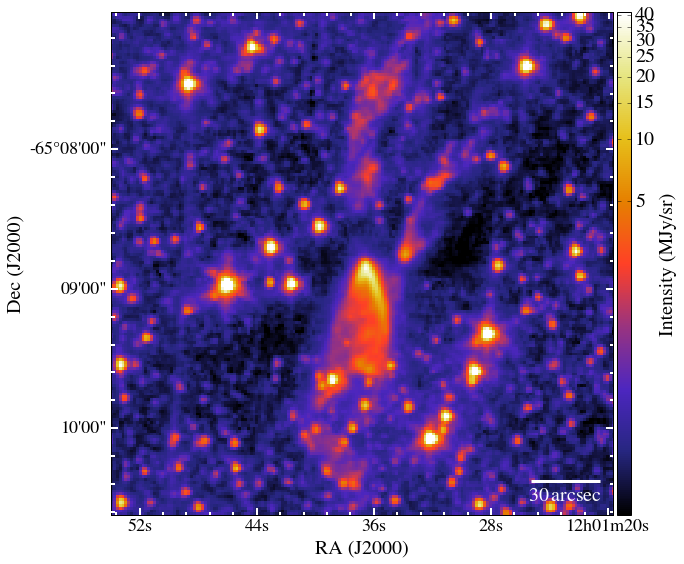

In [4]:
make_image(irac1, plotname='IRAC1')

In [ ]:
path = [irac1,irac2,irac3,irac4]
for ipath in path:
    make_image(ipath)

## Spitzer Image

In [ ]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([irac4, irac2, irac1],'/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb.fits','test_irac.tif',
                     stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb_2d.fits')
img.show_rgb('test.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.05,height=0.05)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_irac.pdf', format='pdf', dpi=300)

## 2MASS Image

In [1]:
twomass_j = '/Users/yaolun/bhr71/data/photometry/2mass_j_band.fits'
twomass_h = '/Users/yaolun/bhr71/data/photometry/2mass_h_band.fits'
twomass_k = '/Users/yaolun/bhr71/data/photometry/2mass_k_band.fits'

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpcEcQh4


INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpcEcQh4 [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpG6cEYH


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpG6cEYH [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpYZ99_y


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpYZ99_y [montage_wrapper.wrappers]
INFO

INFO:astropy:Red:
INFO:astropy:vmin =  6.160e+02 (auto)


: Red: [aplpy.rgb]
INFO: vmin =  6.160e+02 (auto) [aplpy.rgb]
INFO

INFO:astropy:vmax =  8.090e+02 (auto)
INFO:astropy:Green:


: vmax =  8.090e+02 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO

INFO:astropy:vmin =  5.219e+02 (auto)
INFO:astropy:vmax =  7.005e+02 (auto)
INFO:astropy:Blue:


: vmin =  5.219e+02 (auto) [aplpy.rgb]
INFO: vmax =  7.005e+02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO

INFO:astropy:vmin =  1.219e+02 (auto)
INFO:astropy:vmax =  2.188e+02 (auto)


: vmin =  1.219e+02 (auto) [aplpy.rgb]
INFO: vmax =  2.188e+02 (auto) [aplpy.rgb]


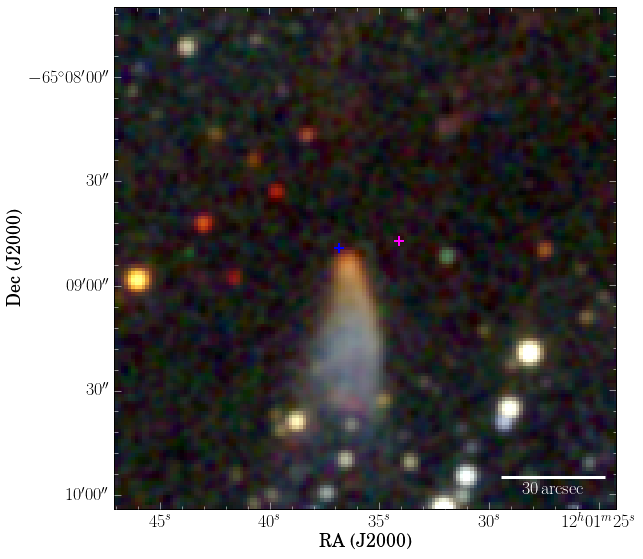

In [6]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([twomass_k, twomass_h, twomass_j],'/Users/yaolun/bhr71/data/photometry/2mass_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/2mass_comb.fits','test_2mass.tif',
                     stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/2mass_comb_2d.fits')
img.show_rgb('test_2mass.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.04,height=0.04)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_2mass.pdf', format='pdf', dpi=300)

## Herschel-PACS image

In [13]:
datadir = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/'
datadir = '/Users/yaolun/test/'
pacs70 = datadir+'hpacs1342224922_20hpppmapb_00_1431606963402.fits'
pacs100 = datadir+'hpacs1342224924_20hpppmapb_00_1431607760123.fits'
pacs160 = datadir+'hpacs1342224922_20hpppmapr_00_1431606963820.fits'

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpTsL1DZ [montage_wrapper.wrappers]


INFO: Auto-setting vmax to  1.261e+00 [aplpy.core]


/Users/yaolun/anaconda/lib/python2.7/site-packages/APLpy-2.0.dev852-py2.7.egg/aplpy/ticks.py:114: UserWarning: WARNING: Requested tick spacing format cannot be shown by current label format. The tick spacing will not be changed.
  warnings.warn("WARNING: Requested tick spacing format cannot be shown by current label format. The tick spacing will not be changed.")


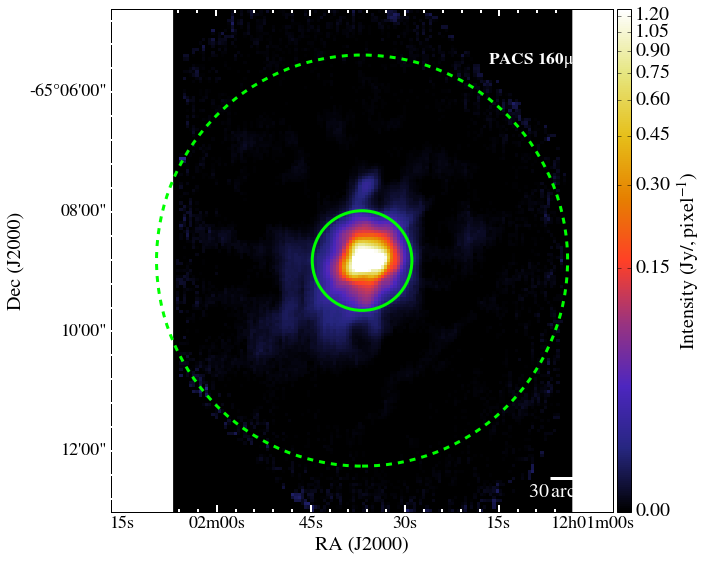

In [30]:
# make_image(pacs70, plotname='pacs70', stretch='arcsinh', int_unit='Jy/pixel', vmin=0, aper=100, text='PACS 70$\mu$m')
# make_image(pacs100, plotname='pacs100', stretch='arcsinh', int_unit='Jy/pixel', vmin=0, aper=100, text='PACS 100$\mu$m')
make_image(pacs160, plotname='pacs160', stretch='arcsinh', int_unit=r'$\rm{Jy/,pixel^{-1}}$', vmin=0,
           aper=50, size=0.07, text='PACS 160$\mu$m')

In [ ]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([pacs70, pacs100, pacs160],'/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb.fits','test_pacs.tif',
                     stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb_2d.fits')
img.show_rgb('test.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.05,height=0.05)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_pacs.pdf', format='pdf', dpi=300)

## Herschel-SPIRE image

In [3]:
datadir = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/'
# spire250 = datadir+'1342226633/level2/extdPSW/hspirepsw1342226633_20pxmp_1431669350548.fits'
# spire350 = datadir+'1342226633/level2/extdPMW/hspirepmw1342226633_20pxmp_1431669350070.fits'
# spire500 = datadir+'1342226633/level2/extdPLW/hspireplw1342226633_20pxmp_1431669349619.fits'
datadir = '/Users/yaolun/test/'
spire250 = datadir+'extdPSW_jypx.fits'
spire350 = datadir+'extdPMW_jypx.fits'
spire500 = datadir+'extdPLW_jypx.fits'

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmp1o15Mx [montage_wrapper.wrappers]


INFO: Auto-setting vmin to  8.179e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.887e-01 [aplpy.core]


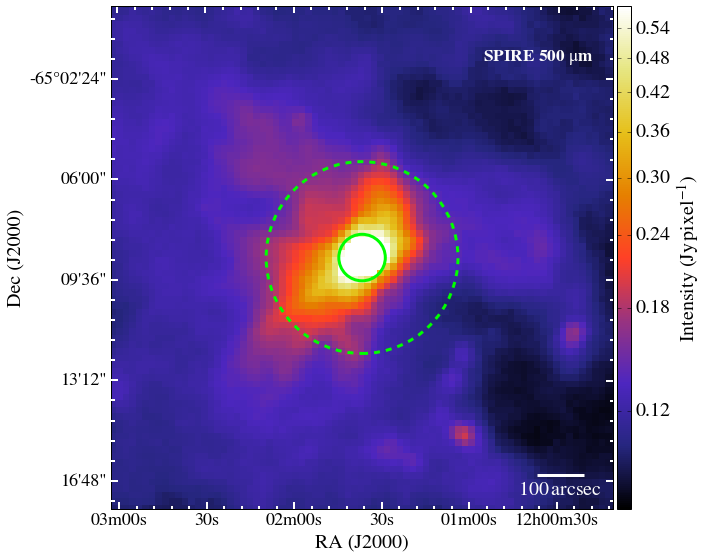

In [28]:
# make_image(spire250, plotname='spire250', stretch='arcsinh', size=0.06, bar_size=100,
#            aper=100, int_unit=r'$\rm{Jy\,pixel^{-1}}$', text='SPIRE 250$\mu$m')
# make_image(spire350, plotname='spire350', stretch='arcsinh', size=0.06, bar_size=100,
#            aper=100, int_unit=r'$\rm{Jy\,pixel^{-1}}$', text='SPIRE 350$\mu$m')
make_image(spire500, plotname='spire500', stretch='log', size=0.15, bar_size=100,
           int_unit=r'$\rm{Jy\,pixel^{-1}}$', text='SPIRE 500 $\mu$m', aper=50)

In [49]:
fuori_111 = ['/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g1/F0272_FO_IMA_0401463_FORF111_CAL_0026-0027.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g6/F0272_FO_IMA_040146163_FORF111_CAL_0032.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g6/F0272_FO_IMA_040146163_FORF111_CAL_0033.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g7/F0272_FO_IMA_040146163_FORF111_CAL_0091.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g7/F0272_FO_IMA_040146163_FORF111_CAL_0092.fits',
             '/Users/yaolun/Dropbox/2016-02-18_FO_F279/p1456/F0279_FO_IMA_040146163_FORF111_CAL_0014.fits',
             '/Users/yaolun/Dropbox/2016-02-18_FO_F279/p1456/F0279_FO_IMA_040146163_FORF111_CAL_0015.fits']
wave_111 = 111

fuori = ['/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g2/F0272_FO_IMA_0401463_FORF348_CAL_0026-0027.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g3/F0272_FO_IMA_040146166_FORF315_CAL_0030-0031.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g4/F0272_FO_IMA_0401461_FORF056_CAL_0022-0023.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g5/F0272_FO_IMA_0401462_FORF077_CAL_0024-0025.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g8/F0272_FO_IMA_040146165_FORF253_CAL_0028-0029.fits']
wave = [348,315,56,77,253]

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpichcRQ [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpzCFao7 [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpT6Ik7u [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpLaUlBb [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpps2OnO [montage_wrapper.wrappers]


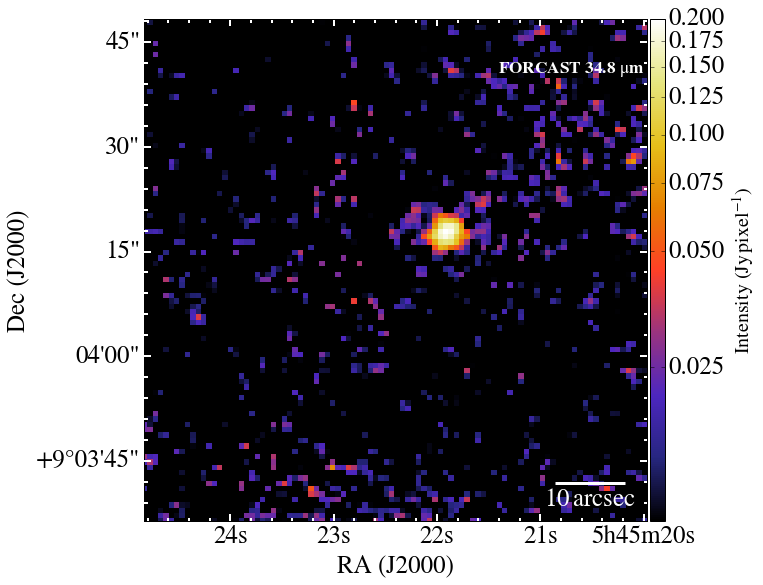

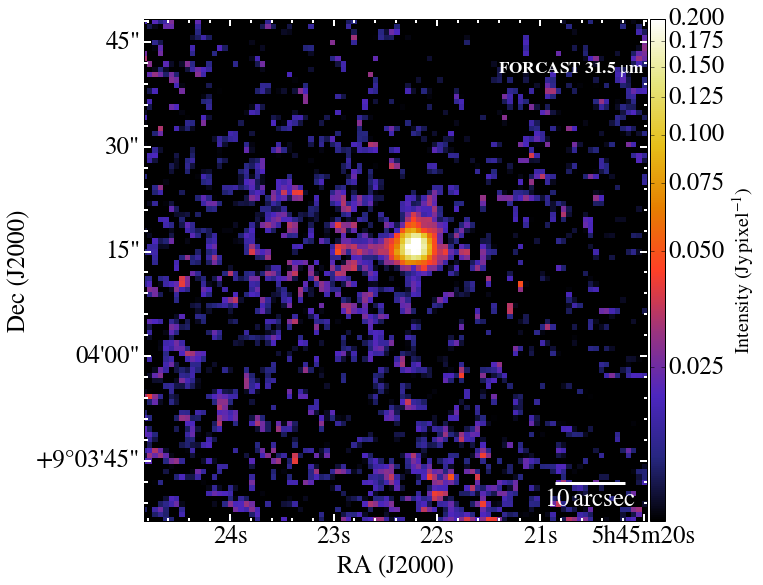

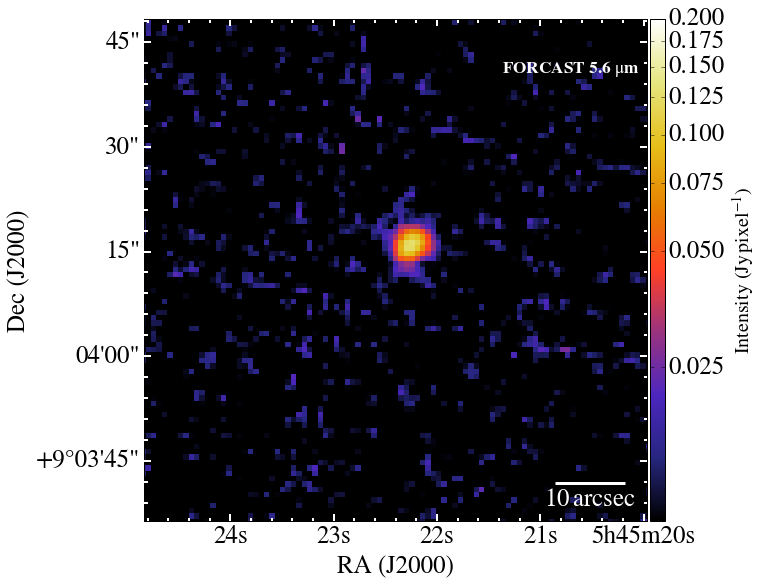

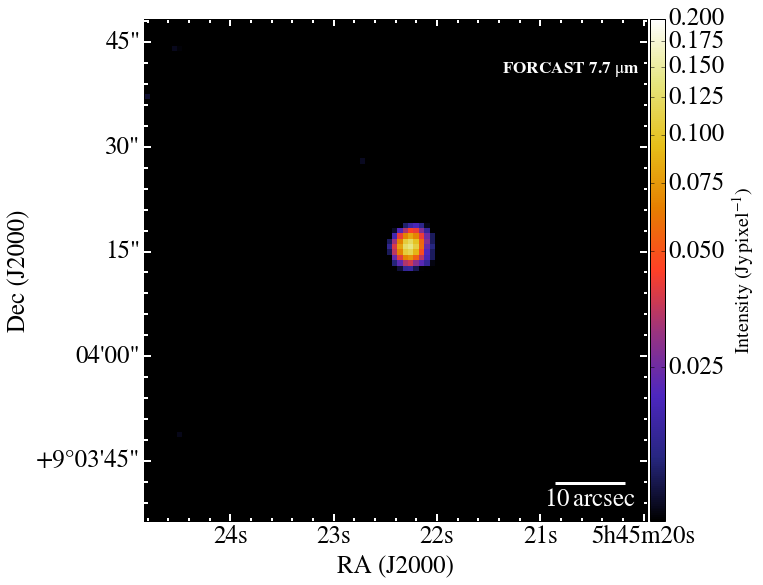

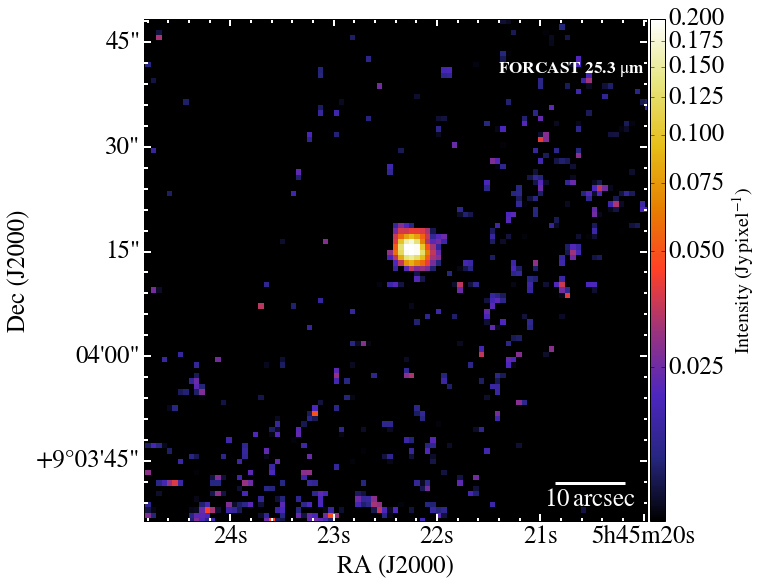

In [52]:
# from astropy.coordinates import SkyCoord
from astropy import units as u 
c = SkyCoord('5 45 22.4 +9 4 12.4', unit=(u.hourangle, u.deg))

for filepath in fuori:
    make_image(filepath, plotname='FUOri_'+str(wave[fuori.index(filepath)])+'reg', stretch='log', size=0.01,
               coord=[c.ra.degree,c.dec.degree], int_unit=r'$\rm{Jy\,pixel^{-1}}$',
               text='FORCAST '+str(wave[fuori.index(filepath)]/10.)+' $\mu$m', vmin=0.01, vmax=0.2, bar_size=10)

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmprysyrB [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpFGFlQL [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpic6olB [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpfwRKUz [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpovP_7o [montage_wrapper.wrappers]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting wor

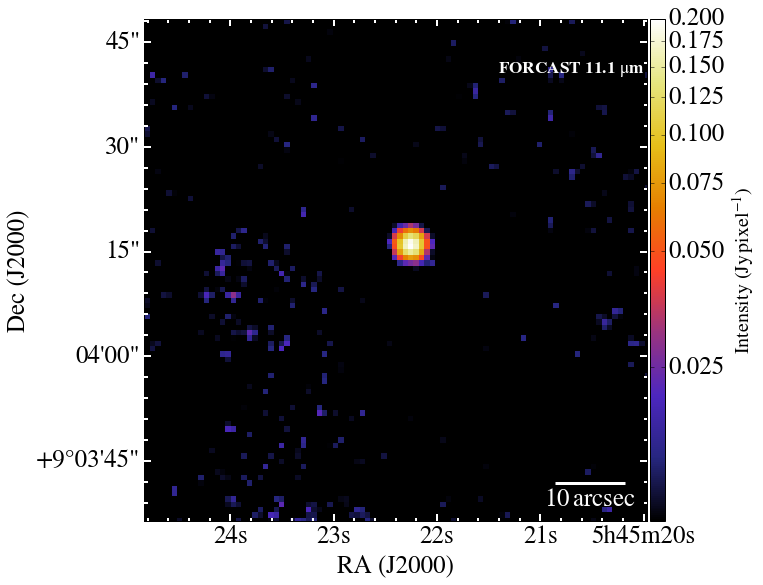

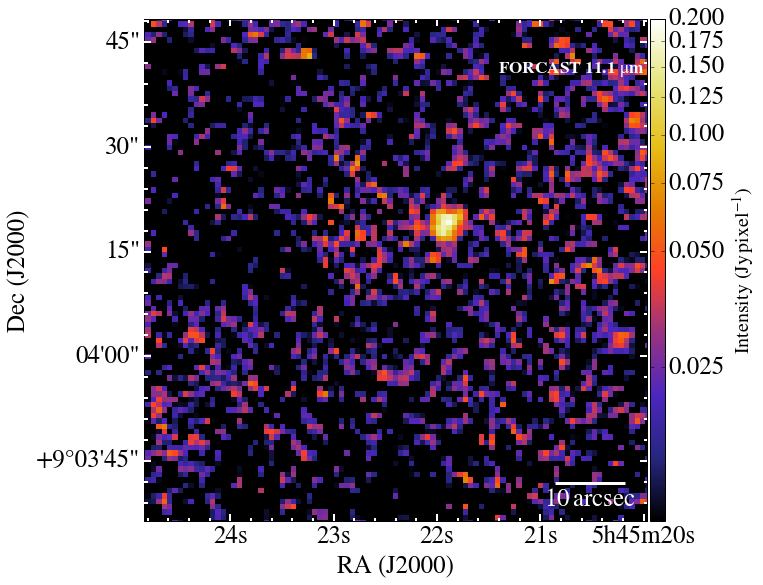

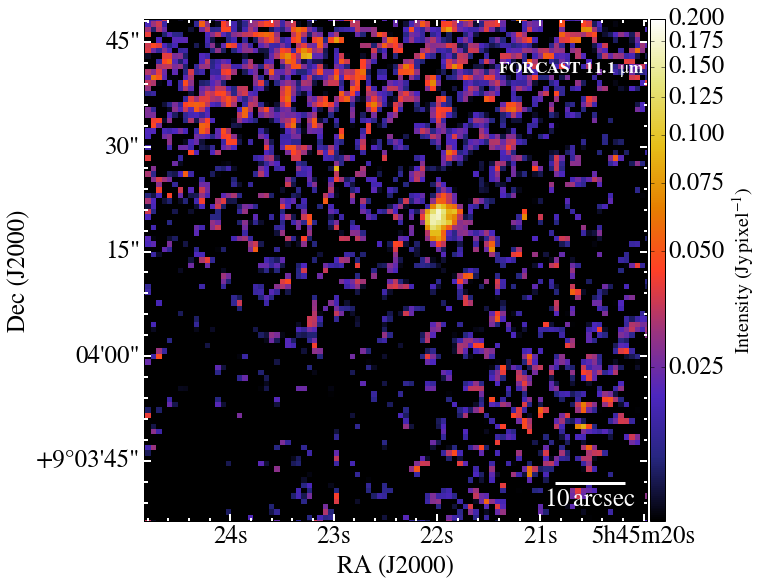

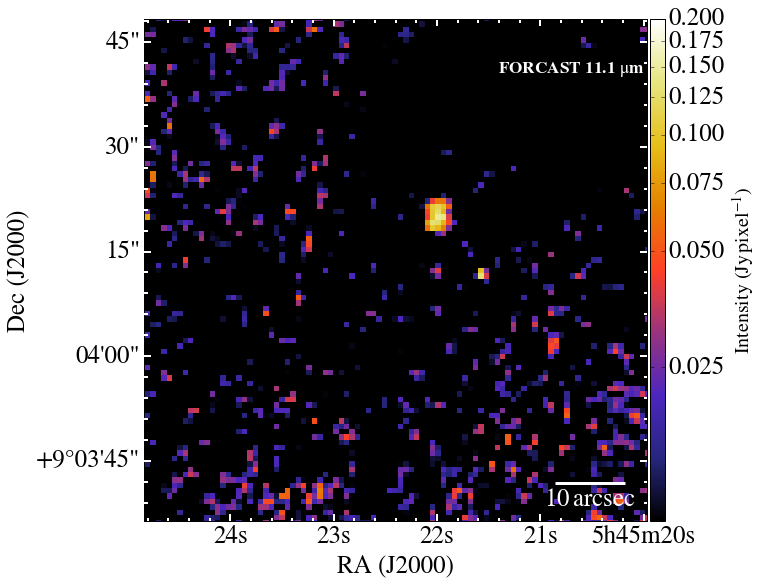

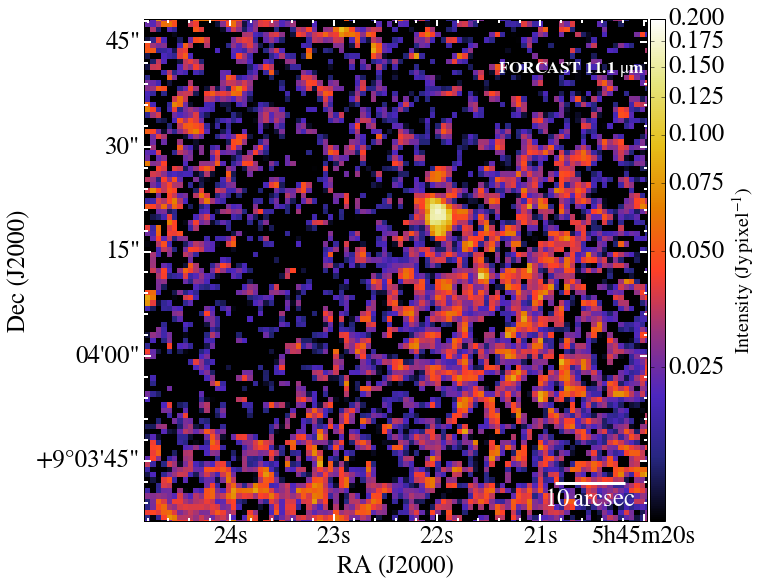

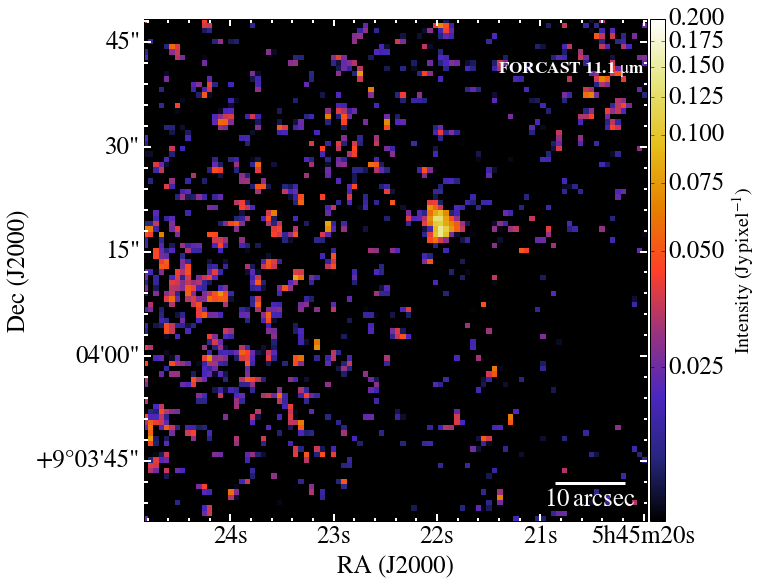

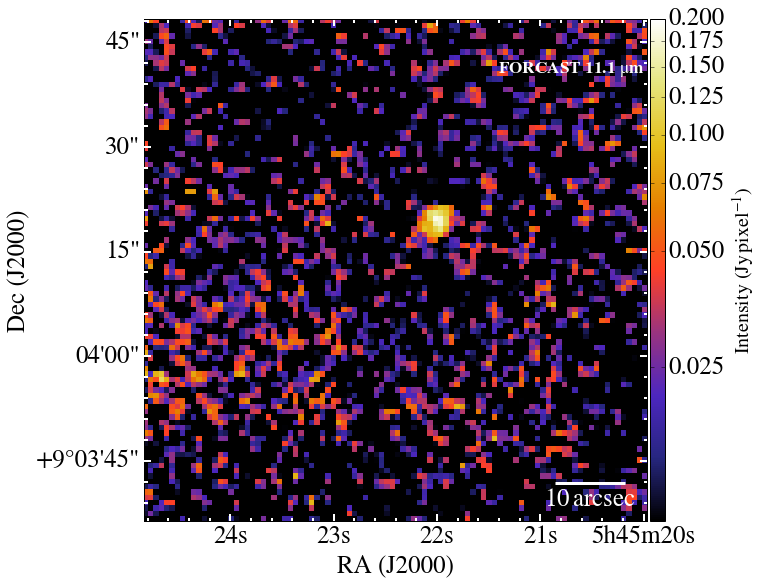

In [51]:
for filepath in fuori_111:
    make_image(filepath, plotname='FUOri_111reg', stretch='log', size=0.01,
               coord=[c.ra.degree,c.dec.degree], int_unit=r'$\rm{Jy\,pixel^{-1}}$',
               text='FORCAST 11.1 $\mu$m', vmin=0.01, vmax=0.2, bar_size=10)